# Ecuaciones Diferenciales Parciales
*** 

De clic en este __[enlace](https://www.youtube.com/)__ para ver el video.

***

### Ecuación diferencial


Expresión matemática donde estan involucradas la función y su derivada(s): 

**ejemplo en Física**

 Ecuación de movimiento de Newton
 
 $$ m \frac{d^2 x(t)}{dt^2} = F(t) $$


### Ecuación diferencial Parcial


Expresión matemática donde estan involucradas la función que puede depender de mas de una variable y su derivada(s):

**Ejemplo en Física**

Ecuación de Onda en 1D:

$$ \frac{\partial^2 u(x,t)}{\partial t^2} = v^2 \frac{\partial^2 u(x,t)}{\partial x^2} $$




## Diferencias Finitas 
***

### ¿Que se quiere? 

Discretizar una derivada en un intervalo en el tiempo $\Delta t$. Por ejemplo: 

_Diferencia de una función función_

$$ \Delta [f] = f(t+h) - f(t) $$

Entonces, una derivada se puede escribir como

$$\frac{d f(t)}{d t} = \lim_{\Delta t \to 0} \frac{f(t+\Delta t)-f(t)}{\Delta t} \approx \frac{\Delta [f] }{\Delta t} + O(\Delta t^2)$$

Segunda derivada: 

$$ \frac{d^2 f(t)}{d t^2} \approx \frac{f(t+\Delta t) - 2f(t)+f(t-\Delta t)}{(\Delta t)^2} $$


### ¿Como se logra? 

Tratando a tiempo como un vector:  

$$t = [t_0,t_1,t_2,...,t_{i-1},t_i,t_{i+1},...,t_N] $$

y calculando las derivadas en cada conjunto de puntos contiguos $t_{i-1}$, $t_i$ y $t_{i+1}$, tal que

$$ \frac{d^2 f(t)}{d t^2} \approx \frac{f_{i+1} - 2f_i + f_{i-1}}{(\Delta t)^2} $$

## Desarrollo: 
***

Una ecuación que describe un movimiento oscilatorio

$$ \frac{d^2 f}{d t^2} = f''(t) =  - \omega^2 f(t) $$

con condiciones iniciales  $f(0)=A$ y $f'(t)=0$ en un intervalo $t \in (0,T]$

#### Solución Analítica

$$ f(t) = A \cos{(\omega t)} $$

### Con la discretización del _vector_ tiempo

**Ecuación**

$$\frac{f_{i+1} - 2f_i + f_{i-1}}{(\Delta t)^2} = - \omega^2 f_i$$

**Primera Derivada** (Condición Inicial $f'(0)=0$)

$$\frac{f_1 - f_{-1}}{2 \Delta t} = 0 $$ 

***
### Algoritmo para encontrar el siguiente punto

1. Fije la condicion inicial al vector solución: $f_0 = A$. 
<br>

2. calcule el primer paso $f_1$ de la derivada primera 

 $$ f_1 = f_0  - \frac{1}{2} (\Delta t)^2 \omega^2 f_0$$
 <br>
 
3.  Calcule los demas puntos del vector solución con la expresión recursiva:

$$f_{i+1} = 2f_i - f_{i-1} - (\Delta t)^2 \omega^2 f_i$$  
***


# Implementación Python
***

#### Ecuación


$$ \frac{d^2 f}{d t^2} = f''(t) =  - \omega^2 f(t) $$

#### Condiciones Iniciales

 $$f(0)=A$$  $$f'(t)=0$$ 
 
#### Intervalo
 
  $$t \in (0,T]$$
  
#### Solución Numerica  

$$ f(t) = A \cos{(\omega t)}$$
 

In [2]:
# Librerias 
import numpy as np
# Constantes
A = 1
omega = 2*np.pi 
dt = 0.05
P = 2*np.pi/omega

num_periodos = 5
T = P*num_periodos


In [5]:
# Solucion Numerica 

Nt = int(round(T/dt))

f = np.zeros(Nt+1)
t = np.linspace(0,Nt*dt,Nt+1)

#Condicion inicial
f[0] = A
f[1] = f[0] - (1/2)*dt**2*omega**2*f[0]

for i in range(1,Nt):
    f[i+1] = 2*f[i] - f[i-1] - dt**2 * omega**2 * f[i]


In [6]:
# Solucion Exacta
f_exacta =  A*np.cos(omega*t)

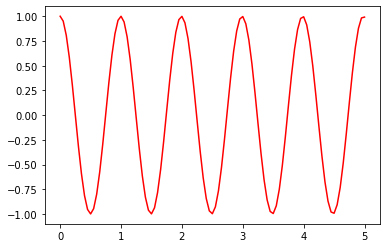

In [7]:
#Grafica 
import matplotlib.pyplot as plt

t_fino = np.linspace(0,t[-1],1000)

plt.plot(t,f,'r-')
plt.show()

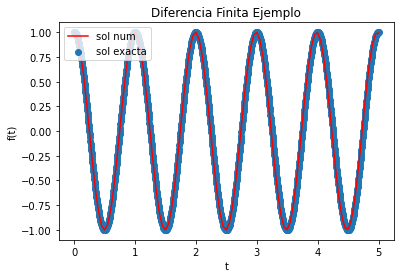

<Figure size 432x288 with 0 Axes>

In [21]:
t_fino = np.linspace(0,t[-1],1000)
f_exacta =  A*np.cos(omega*t_fino)

plt.title('Diferencia Finita Ejemplo')
plt.plot(t,f,'r-',label='numerica')
plt.scatter(t_fino,f_exacta)
plt.legend(['sol num','sol exacta'],loc=2)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

plt.savefig('fig1_df.png')